In [61]:
install.packages("gridExtra")
install.packages("lubridate")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [62]:
#bibliotecas a serem utilizadas 
#visualização de RMSE no jupyter
library(ggplot2)
library(tidyverse)
#library to plot two or more plots in a grid
library(gridExtra)
library(repr)
library(lubridate)

In [170]:
malLinRandom1=as.data.frame(read.table("../expRandomFinal 1-100/resultados/df_movingAverage_simple.txt"))



nrow(malLinRandom1)
malLinRandom1=as.data.frame(read.table("../expRandomFinal 1-100/resultados/df_movingAverage_linear.txt"))


nrow(malLinRandom1)

[1] 5220

[1] 3000

In [171]:
locfRandom1=as.data.frame(read.table("../expRandomFinal 1-100/resultados/df_locf.txt"))
malLinRandom1=as.data.frame(read.table("../expRandomFinal 1-100/resultados/df_movingAverage_linear.txt"))
#splRandom1=as.data.frame(read.table("../expRandomFinal 1-100/resultados/df_spline_interpolation.txt"))
stiRandom1=as.data.frame(read.table("../expRandomFinal 1-100/resultados/df_stine_interpolation.txt"))
#seadecRandom1=as.data.frame(read.table("../expRandomFinal/resultados/df_seadec.txt"))
seasplitRandom1=as.data.frame(read.table("../expRandomFinal 1-100/resultados/df_seasplit.txt"))
ssaRandom1=as.data.frame(read.table("../expRandomFinal 1-100/resultados/df_ssa.txt"))

todosRandom1=rbind(locfRandom1, stiRandom1, malLinRandom1,seasplitRandom1 ,ssaRandom1)
#todosRandom1=rbind(locfRandom1, splRandom1, stiRandom1, malLinRandom1,seasplitRandom1 ,ssaRandom1)
todosRandom1$tamanho=rep(seq(1,100,1), each=30)


locfRandom=as.data.frame(read.table("../expRandomFinal/resultados/df_locf.txt"))
malLinRandom=as.data.frame(read.table("../expRandomFinal/resultados/df_movingAverage_linear.txt"))
#malSimRandom=as.data.frame(read.table("../expRandomFinal/resultados/df_movingAverage_simple.txt"))
#splRandom=as.data.frame(read.table("../expRandomFinal/resultados/df_spline_interpolation.txt"))
stiRandom=as.data.frame(read.table("../expRandomFinal/resultados/df_stine_interpolation.txt"))
#seadecRandom=as.data.frame(read.table("../expRandomFinal/resultados/df_seadec.txt"))
seasplitRandom=as.data.frame(read.table("../expRandomFinal/resultados/df_seasplit.txt"))
ssaRandom=as.data.frame(read.table("../expRandomFinal/resultados/df_ssa.txt"))

nrow(locfRandom)
nrow(stiRandom)
nrow(splRandom)
nrow(seasplitRandom)
nrow(ssaRandom)
nrow(malLinRandom)


#todosRandom=rbind(locfRandom, splRandom, stiRandom, malLinRandom,seasplitRandom, ssaRandom)
todosRandom=rbind(locfRandom, stiRandom, malLinRandom,seasplitRandom, ssaRandom)

todosRandom$tamanho=rep(seq(10,8660,50), each=30)


todosRandom=rbind(todosRandom1, todosRandom)
names(todosRandom)=c("algoritmo" , "rmse", "mse", "mae", "mape", "tamanho")


todosMedia=todosRandom %>%
    group_by(algoritmo, tamanho) %>%
    summarize(rmse = mean(rmse, na.rm = TRUE))

sdTodosMedia = todosRandom %>% 
    group_by(algoritmo, tamanho) %>%
    summarize(sdRmse=sd(rmse, na.rm=TRUE))

todosMedia$sdRmse = sdTodosMedia$sdRmse

n=30 #tamanho da amostra. Ou seja, tem 30 lacunas de tamanho 100, 30 de tamanho 200...
#error=qnorm(0.975)*todosMedia$sdRmse/sqrt(n)
error=1.65*todosMedia$sdRmse/sqrt(n)
todosMedia$error=error
# The errorbars overlapped, so use position_dodge to move them horizontally
pd <- position_dodge(0.0) # move them .05 to the left and right

head(todosMedia)



[1] 5220

[1] 5220

[1] 5220

[1] 5220

[1] 5220

[1] 5220

algoritmo,tamanho,rmse,sdRmse,error
locf,1,0.001916918,0.001815436,0.0005468954
locf,2,0.002638152,0.002125951,0.0006404372
locf,3,0.002651206,0.001217319,0.0003667141
locf,4,0.002603570,0.001305094,0.0003931563
locf,5,0.003531895,0.001682000,0.0005066980
locf,6,0.003069928,0.001713351,0.0005161425


Plot de todos os resultados do experimento aleatório
==

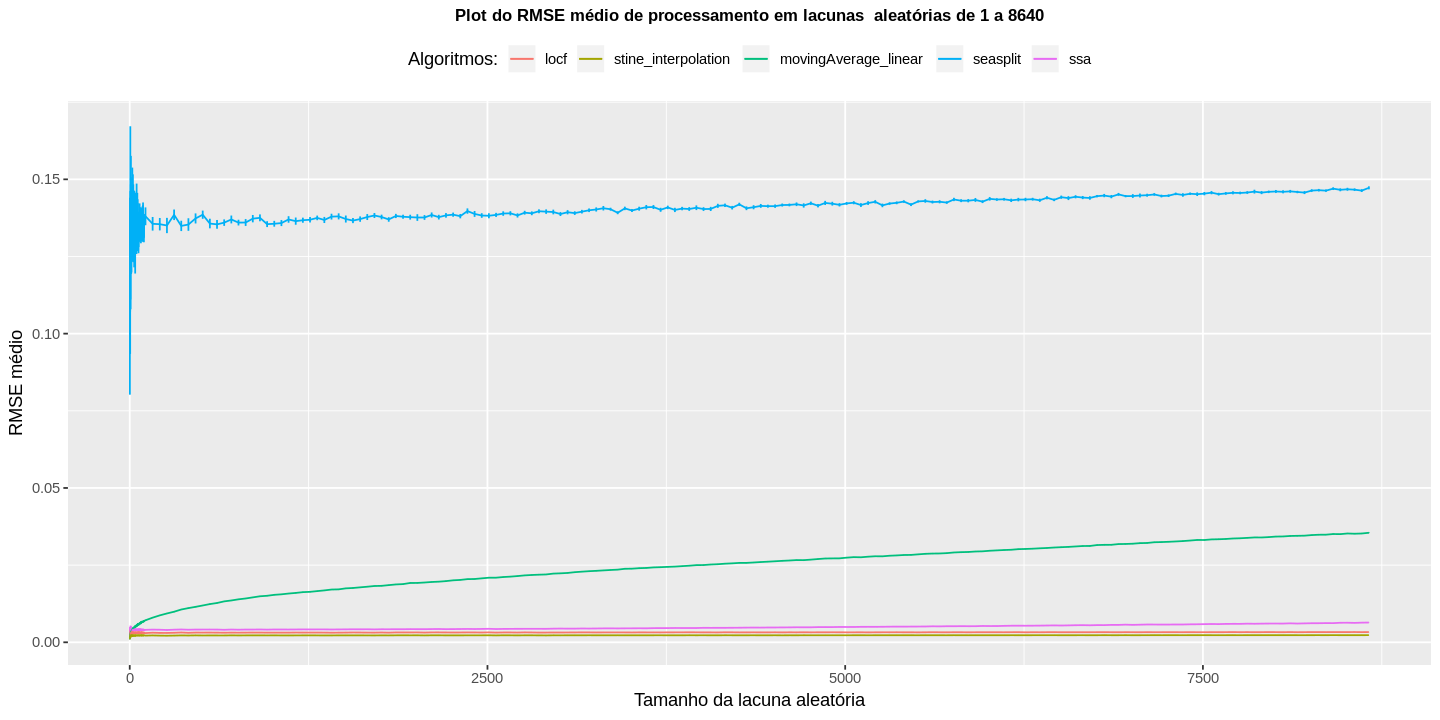

In [172]:
options(repr.plot.width=12, repr.plot.height=6)
rmse=ggplot(todosMedia, aes(x=tamanho, y=rmse, colour=algoritmo))+
  #  geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=rmse-error, ymax=rmse+error), position=pd) +
    theme(plot.title = element_text(hjust = 0.5, size=10))+
    ggtitle("Plot do RMSE médio de processamento em lacunas  aleatórias de 1 a 8640")+  theme(legend.position = "top", plot.title = element_text(hjust = 0.5, size=9, face = "bold"))+
    theme(plot.title = element_text(hjust = 0.5, size=10))+ 
  labs(
    x = "Tamanho da lacuna aleatória",
    y = "RMSE médio",
    colour = "Algoritmos:"
   )

rmse

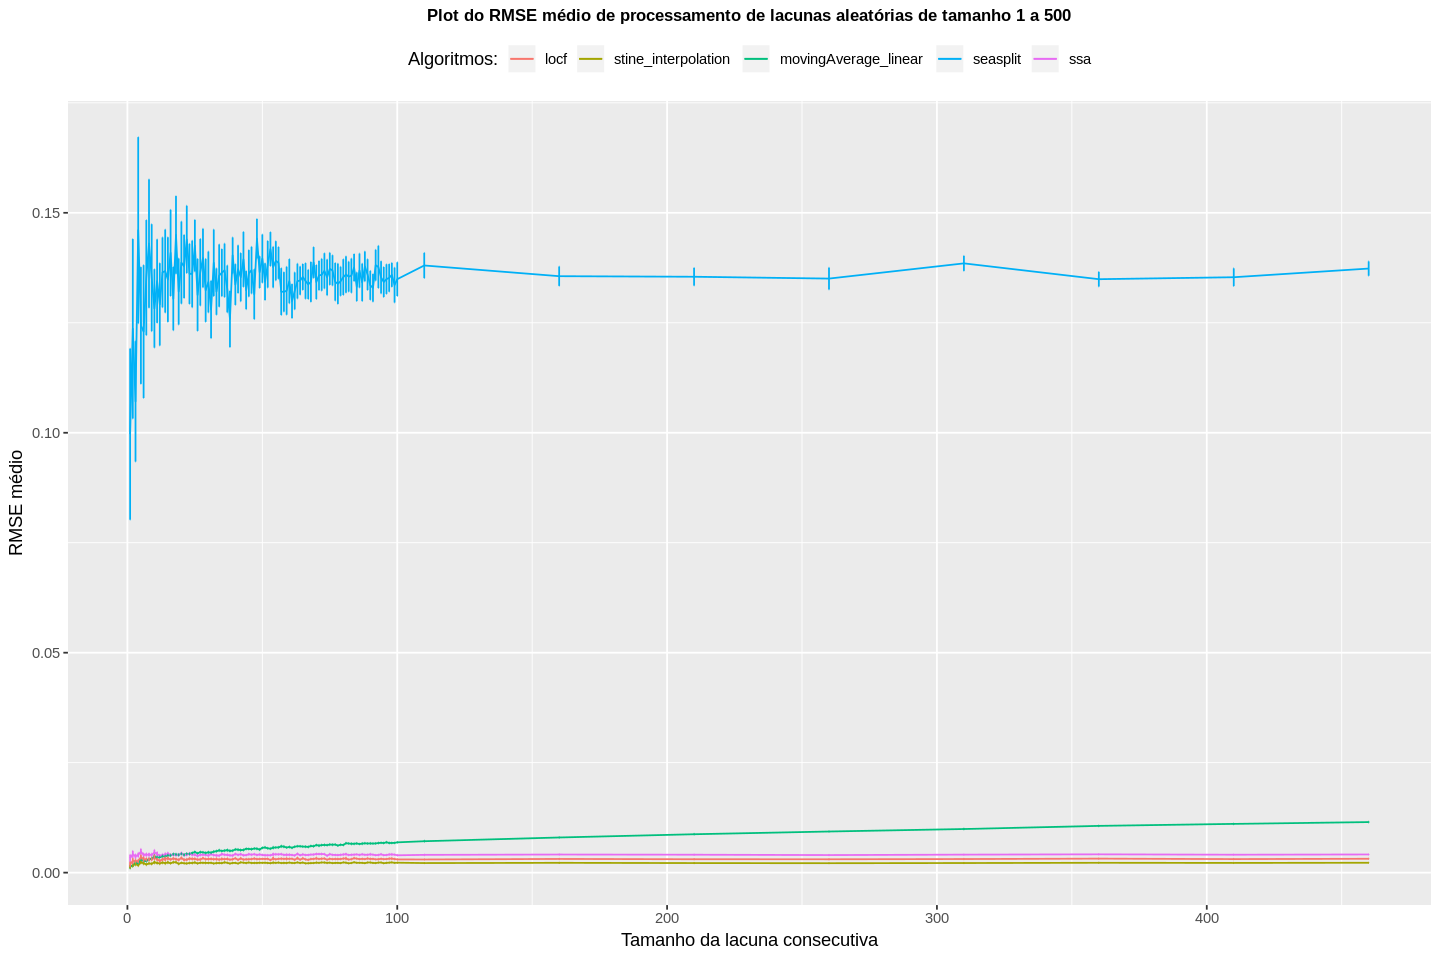

In [155]:
options(repr.plot.width=12, repr.plot.height=8)
ggplot(todosMedia[which(todosMedia$tamanho<500),], aes(x=tamanho, y=rmse, colour=algoritmo))+
  #  geom_point()+
    geom_line()+
    ggtitle("Plot de todos os resultados")+  theme(plot.title = element_text(hjust = 0.5, size=9))+
    geom_errorbar(aes(ymin=rmse-error, ymax=rmse+error), position=pd) +
   ggtitle("Plot do RMSE médio de processamento de lacunas aleatórias de tamanho 1 a 500")+  theme(legend.position = "top", plot.title = element_text(hjust = 0.5, size=9, face = "bold"))+
    theme(plot.title = element_text(hjust = 0.5, size=10))+ 
  labs(
    x = "Tamanho da lacuna consecutiva",
    y = "RMSE médio",
    colour = "Algoritmos:"
   )

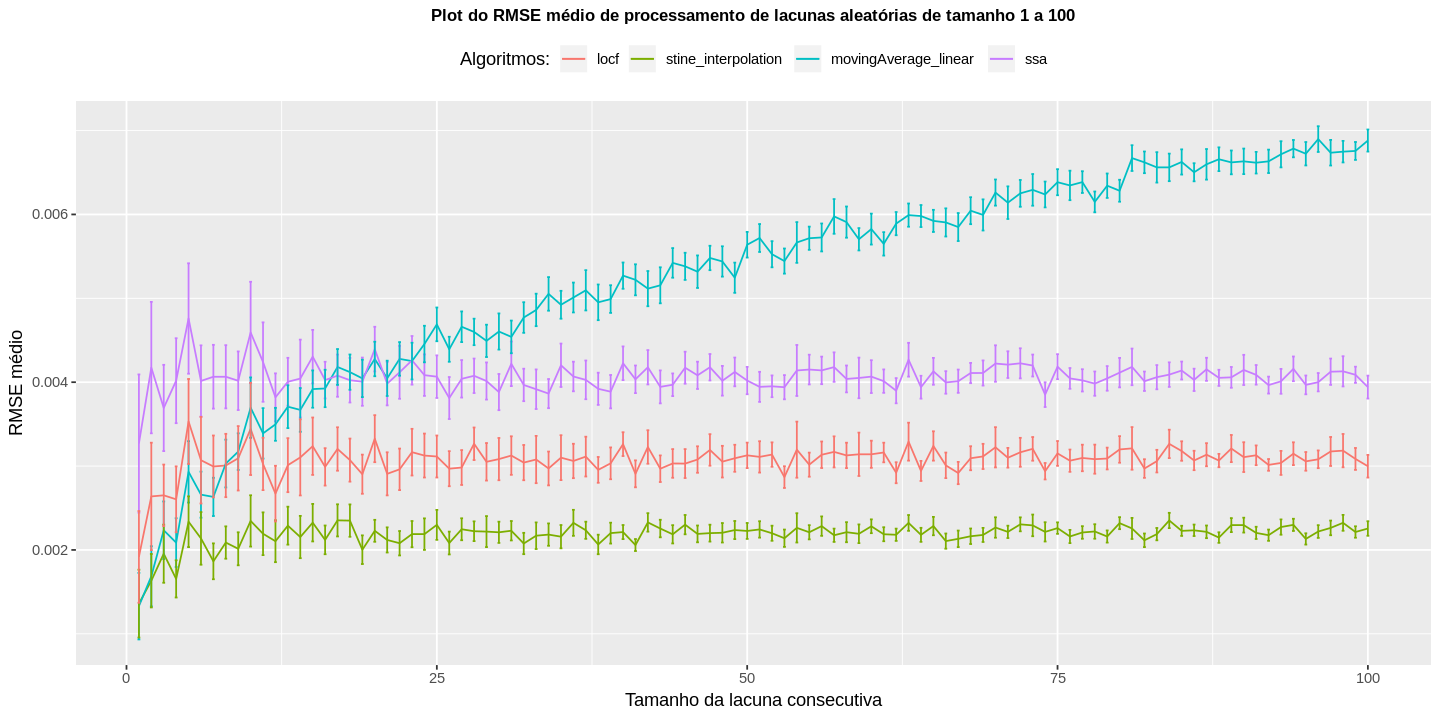

In [156]:
options(repr.plot.width=12, repr.plot.height=6)
#ggplot(todosMedia[which((todosMedia$tamanho<8640) & (todosMedia$algoritmo=="spline_interpolation" | todosMedia$algoritmo=="locf" | todosMedia$algoritmo=="stine_interpolation"  | todosMedia$algoritmo=="ssa")),], aes(x=tamanho, y=rmse, colour=algoritmo))+
ggplot(todosMedia[which((todosMedia$tamanho<=100) & (todosMedia$algoritmo!="seasplit" )),], aes(x=tamanho, y=rmse, colour=algoritmo))+
  #  geom_point()+
    geom_line()+
    ggtitle("Plot de todos os resultados")+  theme(plot.title = element_text(hjust = 0.5, size=9))+
    geom_errorbar(aes(ymin=rmse-error, ymax=rmse+error), position=pd) +
   ggtitle("Plot do RMSE médio de processamento de lacunas aleatórias de tamanho 1 a 100")+  theme(legend.position = "top", plot.title = element_text(hjust = 0.5, size=9, face = "bold"))+
    theme(plot.title = element_text(hjust = 0.5, size=10))+ 
  labs(
    x = "Tamanho da lacuna consecutiva",
    y = "RMSE médio",
    colour = "Algoritmos:"
   )

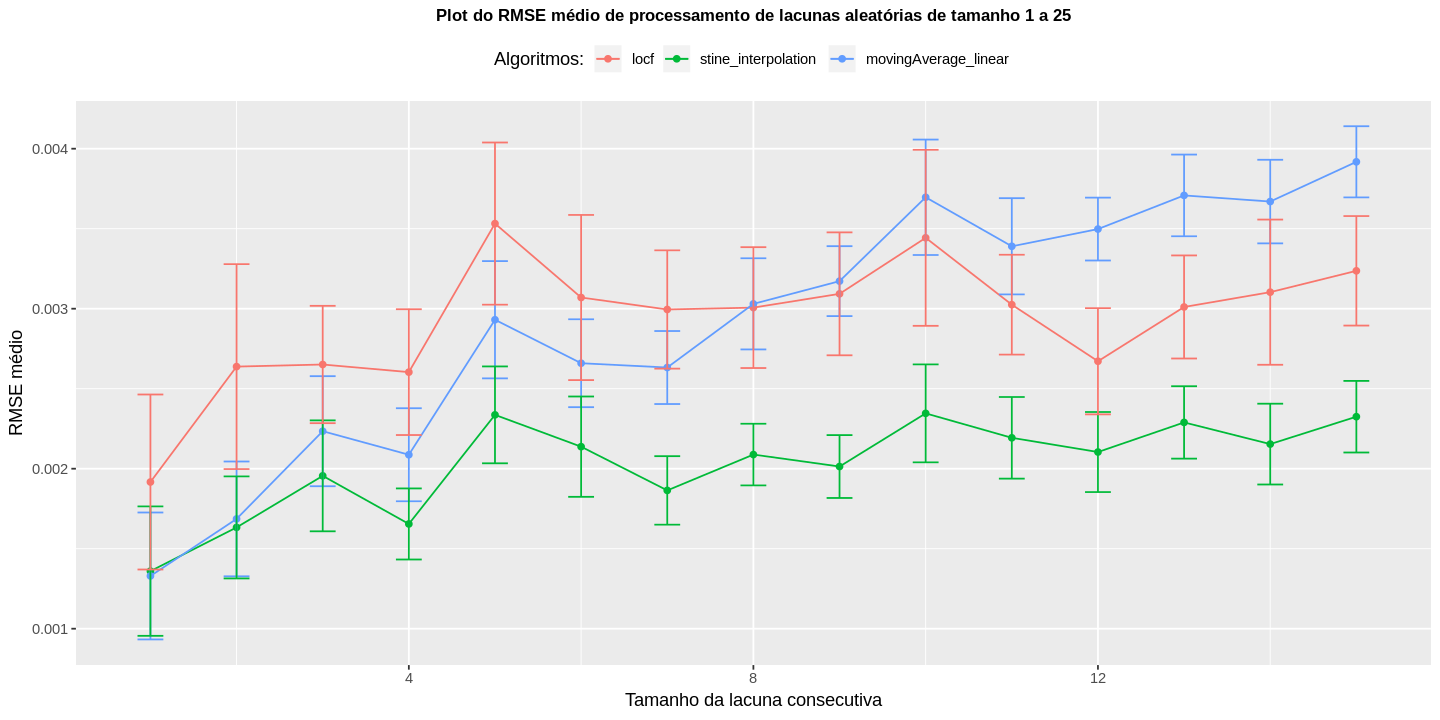

In [157]:
options(repr.plot.width=12, repr.plot.height=6)
#ggplot(todosMedia[which((todosMedia$tamanho<8640) & (todosMedia$algoritmo=="spline_interpolation" | todosMedia$algoritmo=="locf" | todosMedia$algoritmo=="stine_interpolation"  | todosMedia$algoritmo=="ssa")),], aes(x=tamanho, y=rmse, colour=algoritmo))+
ggplot(todosMedia[which((todosMedia$tamanho<=15) & (todosMedia$algoritmo!="seasplit"  & todosMedia$algoritmo!="ssa")),], aes(x=tamanho, y=rmse, colour=algoritmo))+
    geom_point()+
    geom_line()+
    ggtitle("Plot de todos os resultados")+  theme(plot.title = element_text(hjust = 0.5, size=9))+
    geom_errorbar(aes(ymin=rmse-error, ymax=rmse+error), position=pd) +
   ggtitle("Plot do RMSE médio de processamento de lacunas aleatórias de tamanho 1 a 25")+  theme(legend.position = "top", plot.title = element_text(hjust = 0.5, size=9, face = "bold"))+
    theme(plot.title = element_text(hjust = 0.5, size=10))+ 
  labs(
    x = "Tamanho da lacuna consecutiva",
    y = "RMSE médio",
    colour = "Algoritmos:"
   )

NOTA:
--
* como pode ser observado, no primeiro ponto,  Spline, Stine, Locf e SMA são iguais estatisticamente como algoritmos com melhores RMSE. 
de 1 a 6, o moving average juntamente com Stine e Spline são iguais. 
Spline e Stine são iguais até o ponto 36. Depois o Stine continua sendo o melhor RMSE até o fim do experimento 


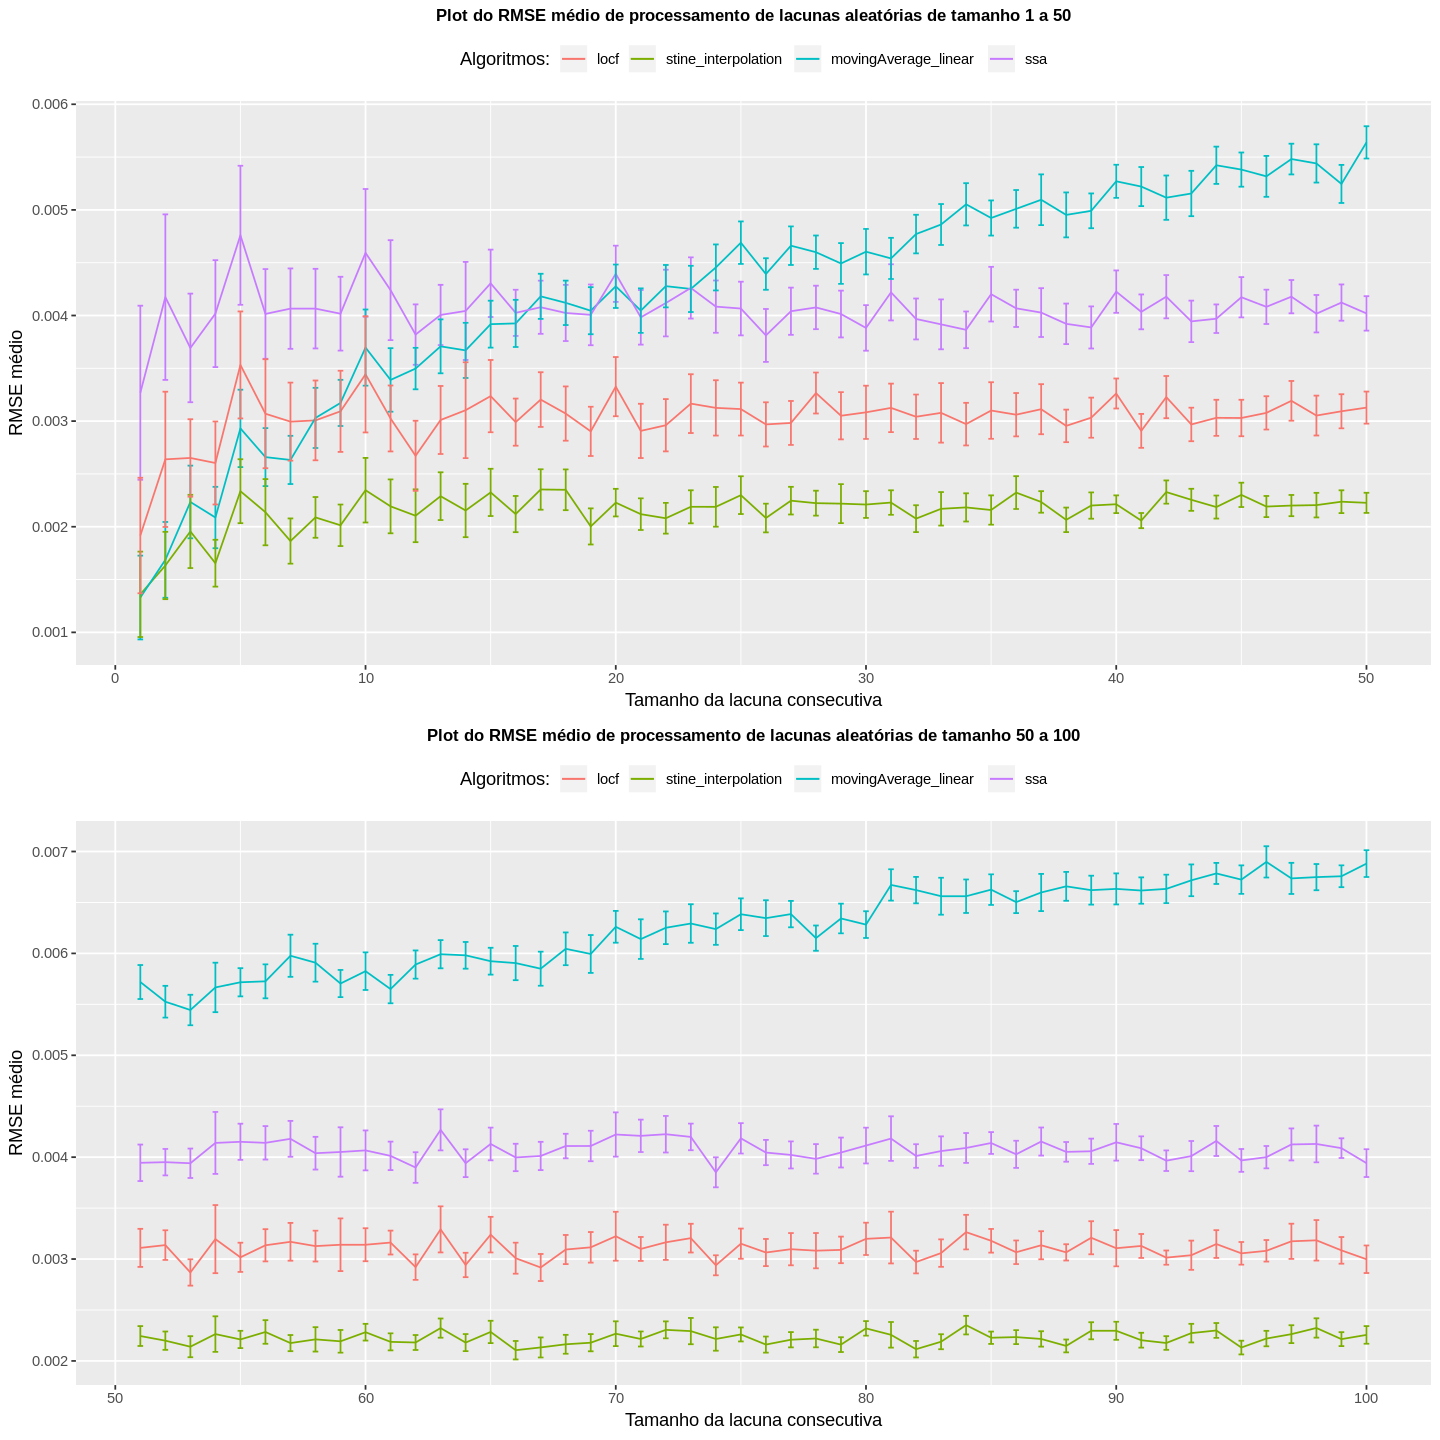

In [158]:
options(repr.plot.width=12, repr.plot.height=12)
#ggplot(todosMedia[which((todosMedia$tamanho<8640) & (todosMedia$algoritmo=="spline_interpolation" | todosMedia$algoritmo=="locf" | todosMedia$algoritmo=="stine_interpolation"  | todosMedia$algoritmo=="ssa")),], aes(x=tamanho, y=rmse, colour=algoritmo))+

p1=ggplot(todosMedia[which((todosMedia$tamanho<=50) & (todosMedia$algoritmo!="seasplit" )),], aes(x=tamanho, y=rmse, colour=algoritmo))+
  #  geom_point()+
    geom_line()+
    ggtitle("Plot de todos os resultados")+  theme(plot.title = element_text(hjust = 0.5, size=9))+
    geom_errorbar(aes(ymin=rmse-error, ymax=rmse+error), position=pd) +
   ggtitle("Plot do RMSE médio de processamento de lacunas aleatórias de tamanho 1 a 50")+  theme(legend.position = "top", plot.title = element_text(hjust = 0.5, size=9, face = "bold"))+
    theme(plot.title = element_text(hjust = 0.5, size=10))+ 
  labs(
    x = "Tamanho da lacuna consecutiva",
    y = "RMSE médio",
    colour = "Algoritmos:"
   )
p2=ggplot(todosMedia[which((todosMedia$tamanho<=100 & todosMedia$tamanho>50) & (todosMedia$algoritmo!="seasplit" )),], aes(x=tamanho, y=rmse, colour=algoritmo))+
  #  geom_point()+
    geom_line()+
    ggtitle("Plot de todos os resultados")+  theme(plot.title = element_text(hjust = 0.5, size=9))+
    geom_errorbar(aes(ymin=rmse-error, ymax=rmse+error), position=pd) +
   ggtitle("Plot do RMSE médio de processamento de lacunas aleatórias de tamanho 50 a 100") + theme(legend.position = "top", plot.title = element_text(hjust = 0.5, size=9, face = "bold"))+
    theme(plot.title = element_text(hjust = 0.5, size=10))+ 
  labs(
    x = "Tamanho da lacuna consecutiva",
    y = "RMSE médio",
    colour = "Algoritmos:"
   )
grid.arrange(p1,p2, ncol=1)

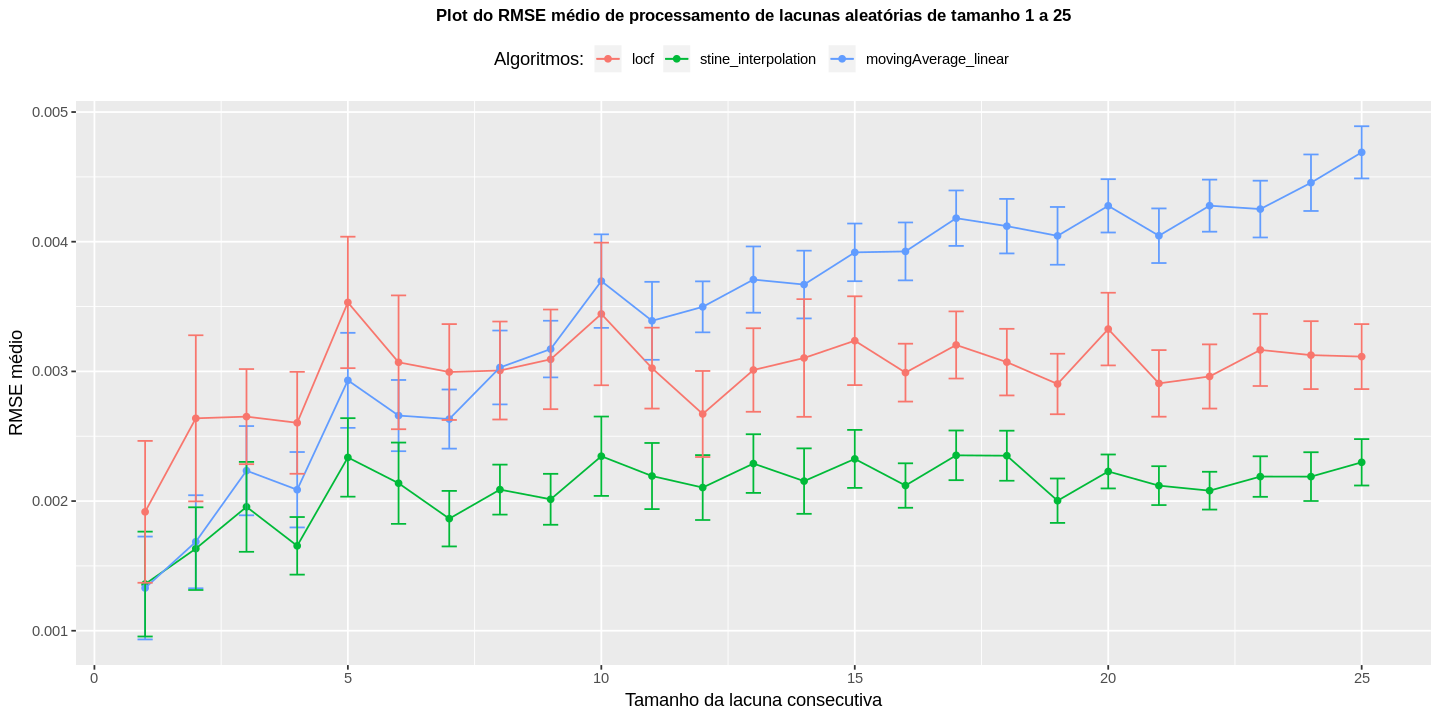

In [173]:
options(repr.plot.width=12, repr.plot.height=6)
#ggplot(todosMedia[which((todosMedia$tamanho<8640) & (todosMedia$algoritmo=="spline_interpolation" | todosMedia$algoritmo=="locf" | todosMedia$algoritmo=="stine_interpolation"  | todosMedia$algoritmo=="ssa")),], aes(x=tamanho, y=rmse, colour=algoritmo))+
ggplot(todosMedia[which((todosMedia$tamanho<=25) & (todosMedia$algoritmo!="seasplit"  & todosMedia$algoritmo!="ssa")),], aes(x=tamanho, y=rmse, colour=algoritmo))+
    geom_point()+
    geom_line()+
    ggtitle("Plot de todos os resultados")+  theme(plot.title = element_text(hjust = 0.5, size=9))+
    geom_errorbar(aes(ymin=rmse-error, ymax=rmse+error), position=pd) +
   ggtitle("Plot do RMSE médio de processamento de lacunas aleatórias de tamanho 1 a 25")+  theme(legend.position = "top", plot.title = element_text(hjust = 0.5, size=9, face = "bold"))+
    theme(plot.title = element_text(hjust = 0.5, size=10))+ 
  labs(
    x = "Tamanho da lacuna consecutiva",
    y = "RMSE médio",
    colour = "Algoritmos:"
   )

Tempo 
===

In [164]:
algoritmo1a100=read.table("../expRandomFinal 1-100/time/alg.txt")
tempo1a100=read.table("../expRandomFinal 1-100/time/tempo.txt")
b=as.data.frame(cbind(algoritmo1a100,tempo1a100))
b$tamanho=rep(seq(1,100,1), each=30)

In [177]:
algoritmo100a10800=read.table("../expRandomFinal/time/alg.txt")
tempo100a10800=read.table("../expRandomFinal/time/tempo.txt")
a=as.data.frame(cbind(algoritmo100a10800, tempo100a10800))
a$tamanho=rep(seq(10,8660,50), each=30)


algoritmo1a100=read.table("../expRandomFinal 1-100/time/alg.txt")
tempo1a100=read.table("../expRandomFinal 1-100/time/tempo.txt")
b=as.data.frame(cbind(algoritmo1a100,tempo1a100))
b$tamanho=rep(seq(1,100,1), each=30)


a=rbind(b,a)
names(a)=c("algoritmo", "tempo", "tamanho")
head(a)
a$tempo=as.numeric(hms(a$tempo))

a$tempo=a$tempo/100
mediaTempo= a %>% group_by(algoritmo, tamanho) %>%
summarize(tempo = mean(tempo, na.rm = TRUE))

sdTempo = a %>% group_by(algoritmo, tamanho) %>%
summarize(sd=sd(tempo, na.rm=TRUE))
mediaTempo$sd=sdTempo$sd


n=30 #tamanho da amostra. Ou seja, tem 30 lacunas de tamanho 100, 30 de tamanho 200...
error=qnorm(0.975)*mediaTempo$sd/sqrt(n)
mediaTempo$error=error
# The errorbars overlapped, so use position_dodge to move them horizontally
pd <- position_dodge(0.2) # move them .05 to the left and right

#mediaTempo= mediaTempo[which(mediaTempo$algoritmo=="locf" |  mediaTempo$algoritmo=="movingAverage_simple" | mediaTempo$algoritmo=="stine_interpolation" | mediaTempo$algoritmo=="seasplit" | mediaTempo$algoritmo=="ssa"),]



algoritmo,tempo,tamanho
spline_interpolation,0:00.11,1
spline_interpolation,0:00.14,1
spline_interpolation,0:00.04,1
spline_interpolation,0:00.04,1
spline_interpolation,0:00.04,1
spline_interpolation,0:00.04,1


In [178]:
algoritmo100a10800=read.table("../expRandomFinal/time/alg.txt")
tempo100a10800=read.table("../expRandomFinal/time/tempo.txt")
a=as.data.frame(cbind(algoritmo100a10800, tempo100a10800))
a$tamanho=rep(seq(10,8660,50), each=30)

algoritmo1a100=read.table("../expOriginal1-100/time/alg.txt")
tempo1a100=read.table("../expOriginal1-100/time/tempo.txt")
b=as.data.frame(cbind(algoritmo1a100,tempo1a100))
b$tamanho=rep(seq(1,99,1), each=30)

a=rbind(b,a)
names(a)=c("algoritmo", "tempo", "tamanho")
head(a)
a$tempo=as.numeric(hms(a$tempo))


a$tempo=a$tempo/100
mediaTempo= a %>% group_by(algoritmo, tamanho) %>%
summarize(tempo = mean(tempo, na.rm = TRUE))

sdTempo = a %>% group_by(algoritmo, tamanho) %>%
summarize(sd=sd(tempo, na.rm=TRUE))
mediaTempo$sd=sdTempo$sd


n=30 #tamanho da amostra. Ou seja, tem 30 lacunas de tamanho 100, 30 de tamanho 200...
error=qnorm(0.975)*mediaTempo$sd/sqrt(n)
mediaTempo$error=error
# The errorbars overlapped, so use position_dodge to move them horizontally
pd <- position_dodge(0.2) # move them .05 to the left and right


#ajust
temp=(mediaTempo[which(mediaTempo$algoritmo=="seasplit" & mediaTempo$tamanho<=99), 3] - 0.65)
nrow(temp)
temp2=(mediaTempo[which(mediaTempo$algoritmo=="seasplit" & mediaTempo$tamanho>99), 3])
temp1=rbind(temp, temp2)
mediaTempo[which(mediaTempo$algoritmo=="seasplit"),3] = temp1




algoritmo,tempo,tamanho
linear_interpolation,0:00.03,1
linear_interpolation,0:00.05,1
linear_interpolation,0:00.03,1
linear_interpolation,0:00.04,1
linear_interpolation,0:00.04,1
linear_interpolation,0:00.03,1


[1] 99

In [179]:
dfCompleto=as.data.frame(rbind(mediaTempo[which(mediaTempo$algoritmo=="locf"), 1:3], 
            mediaTempo[which(mediaTempo$algoritmo=="movingAverage_simple"), 1:3], 
            mediaTempo[which(mediaTempo$algoritmo=="stine_interpolation"), 1:3], 
            mediaTempo[which(mediaTempo$algoritmo=="seasplit"), 1:3], 
            mediaTempo[which(mediaTempo$algoritmo=="ssa"), 1:3]
           ))
teste2=as.data.frame(rbind(todosMedia[which(todosMedia$algoritmo=="locf"), 1:3], 
            todosMedia[which(todosMedia$algoritmo=="movingAverage_simple"), 1:3], 
            todosMedia[which(todosMedia$algoritmo=="stine_interpolation"), 1:3], 
            todosMedia[which(todosMedia$algoritmo=="seasplit"), 1:3], 
            todosMedia[which(todosMedia$algoritmo=="ssa"), 1:3]
           ))
dfCompleto$rmse=teste2[,3]


ERROR: Error in `$<-.data.frame`(`*tmp*`, rmse, value = c(0.00191691779662963, : replacement has 1088 rows, data has 1355


In [181]:
teste= mediaTempo[which(mediaTempo$algoritmo=="locf" ),]
mean(teste$tempo)        

teste= mediaTempo[which(mediaTempo$algoritmo=="movingAverage_simple" ),]
mean(teste$tempo)        
teste= mediaTempo[which(mediaTempo$algoritmo=="stine_interpolation" ),]
mean(teste$tempo)        
teste= mediaTempo[which(mediaTempo$algoritmo=="seasplit" ),]
mean(teste$tempo)        
teste= mediaTempo[which(mediaTempo$algoritmo=="ssa" ),]
mean(teste$tempo)        

#|  mediaTempo$algoritmo=="movingAverage_simple" | mediaTempo$algoritmo=="stine_interpolation" | mediaTempo$algoritmo=="seasplit" | mediaTempo$algoritmo=="ssa"),]


[1] 0.03136839

[1] 1.611063

[1] 0.08115806

[1] 1.022872

[1] 0.7908469

In [ ]:
algTempo=ggplot(mediaTempo, aes(x=tamanho, y=tempo, colour=algoritmo))+
	geom_line()+
    geom_errorbar(aes(ymin=tempo-error, ymax=tempo+error), position=pd) 
    #+geom_point()

ggplot(mediaTempo[which(mediaTempo$algoritmo=="" | mediaTempo$tamanho<1000),], aes(x=tamanho, y=tempo, colour=algoritmo))+
geom_errorbar(aes(ymin=tempo-error, ymax=tempo+error), position=pd) +
geom_line()#+ geom_point()


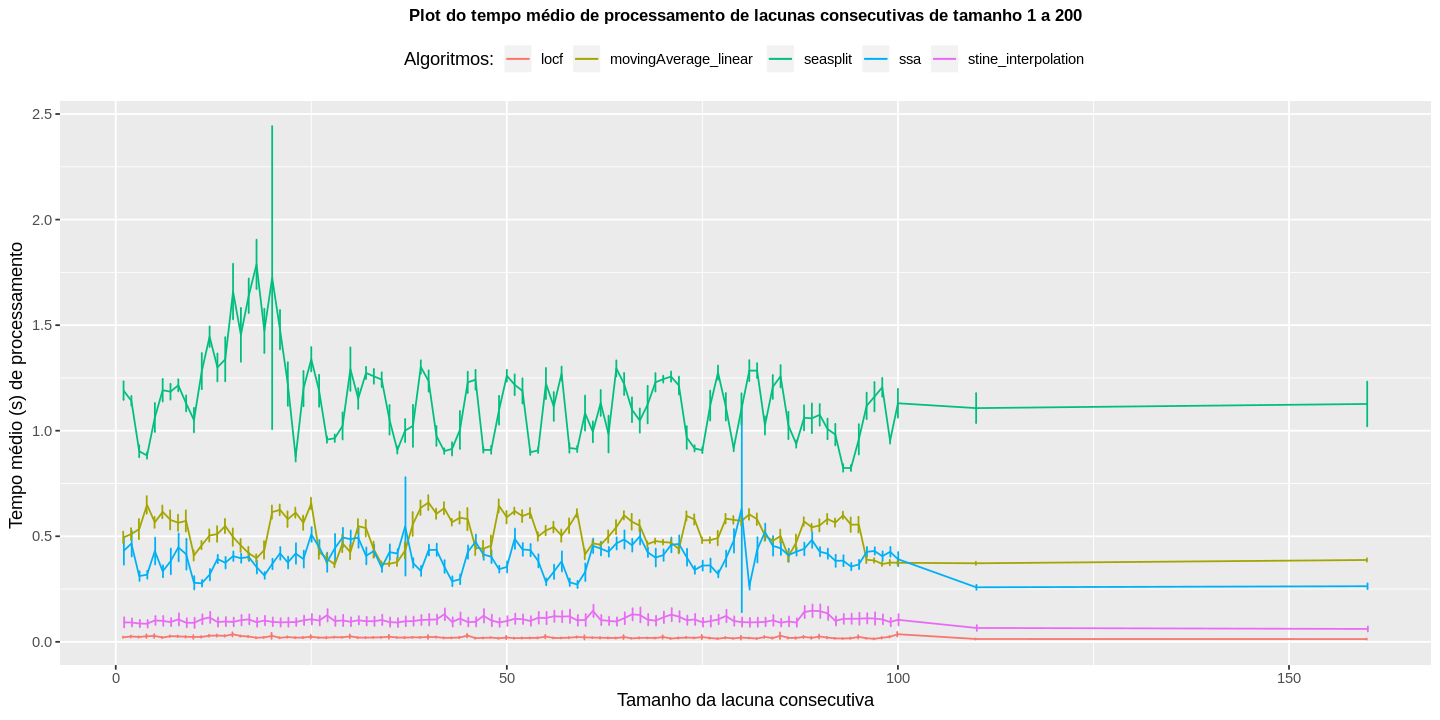

In [167]:
options(repr.plot.width=12, repr.plot.height=6)
#ggplot(mediaTempo[which(mediaTempo$tamanho<500) & (mediaTempo$algoritmo=="stine_interpolation" | mediaTempo$algoritmo=="ssa" | mediaTempo$algoritmo=="movingAverage_linear" | mediaTempo$algoritmo=="locf" | mediaTempo$algoritmo=="seasplit"),], aes(x=tamanho, y=tempo, colour=algoritmo))+
ggplot(mediaTempo[which((mediaTempo$algoritmo=="stine_interpolation" | mediaTempo$algoritmo=="ssa" | mediaTempo$algoritmo=="movingAverage_linear" | mediaTempo$algoritmo=="locf" | mediaTempo$algoritmo=="seasplit") & mediaTempo$tamanho<=200),], aes(x=tamanho, y=tempo, colour=algoritmo))+
geom_errorbar(aes(ymin=tempo-error, ymax=tempo+error), position=pd) +
geom_line() +
    ggtitle("Plot do tempo médio de processamento de lacunas consecutivas de tamanho 1 a 200")+  theme(legend.position = "top", plot.title = element_text(hjust = 0.5, size=9, face = "bold"))+
    theme(plot.title = element_text(hjust = 0.5, size=10))+ 
  labs(
    x = "Tamanho da lacuna consecutiva",
    y = "Tempo médio (s) de processamento ",
    colour = "Algoritmos:"
   )

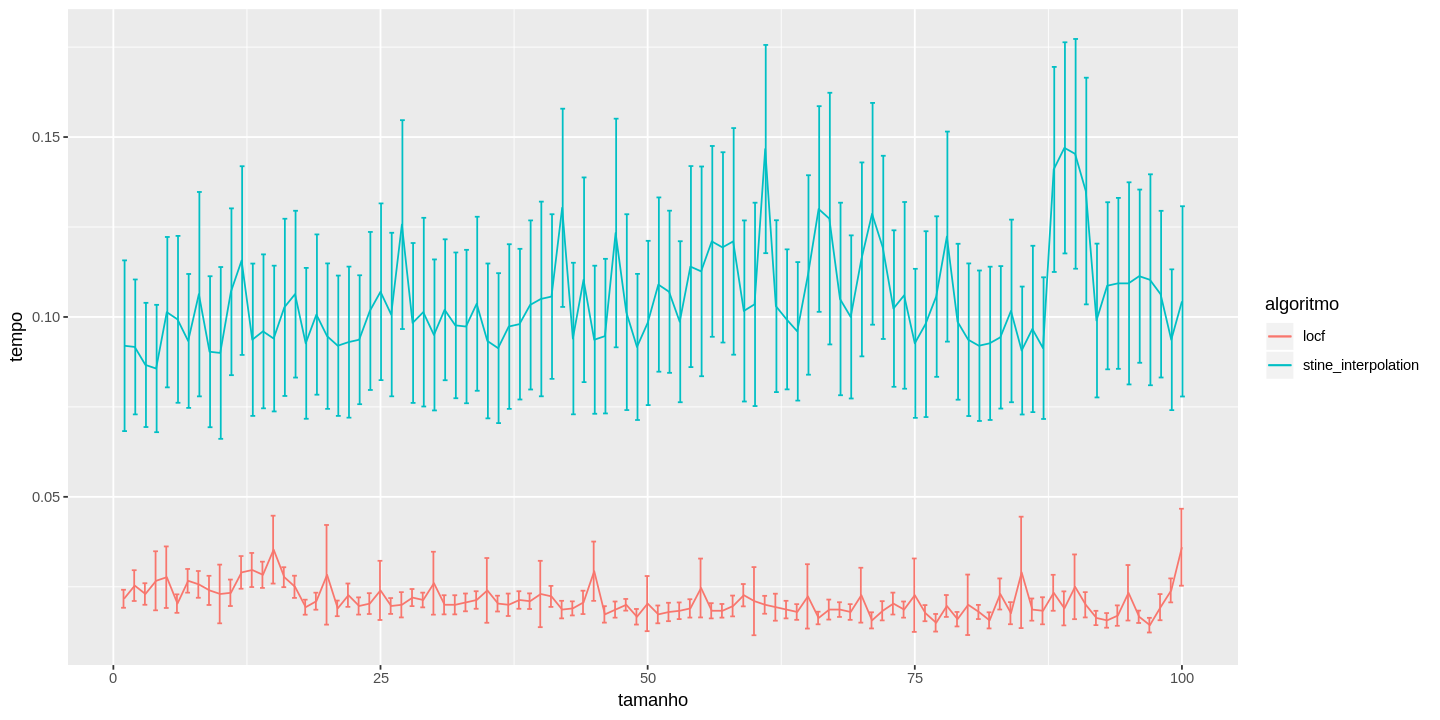

In [166]:
options(repr.plot.width=12, repr.plot.height=6)
#ggplot(mediaTempo[which((mediaTempo$algoritmo=="stine_interpolation" | mediaTempo$algoritmo!="ssa" | mediaTempo$algoritmo=="movingAverage_linear" | mediaTempo$algoritmo=="locf" | mediaTempo$algoritmo=="seasplit") & mediaTempo$tamanho<10000),], aes(x=tamanho, y=tempo, colour=algoritmo))+
ggplot(mediaTempo[which((mediaTempo$algoritmo=="stine_interpolation" | mediaTempo$algoritmo=="locf") & mediaTempo$tamanho<=100),], aes(x=tamanho, y=tempo, colour=algoritmo))+
geom_errorbar(aes(ymin=tempo-error, ymax=tempo+error), position=pd) +
geom_line()